In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from copy import deepcopy

In [2]:
!pip install brian2
!pip install neurodynex3
from brian2 import *

     |████████████████████████████████| 1.2MB 7.0MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257133 sha256=7de94f0e6659a311e8b9c34284b0f2bf2e9ad174d8ac9cc43a7ba8713471e8d5
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 1.6MB 17.0MB/s 
     |████████████████████████████████| 163kB 36.0MB/s 
  Created wheel for brian2: filename=Brian2-2.3-cp37-cp37m-linux_x86_64.whl size=1283915 sha256=db304c8a41f5661de2be6d26ae70e4b542821962e63cbccf1375861278c014d3
  Stored in directory: /root/.cache/pip/wheels/d0/53/ca/54953abc5f741ebd69a87da3b87f3630c5073d26d2d4426cc9
Successfully built brian2
  Found existing installation: Brian2 2.4.2
    Uninstalling Brian2-2.4.2:
      Successfully uninstalled Brian2-2.4.2


## Hopfield network model

In this simplified Hopfied model, each neuron can only take values +1 or -1. The network stores pixel patterns, and attempts to retrieve them given some cue in the form of a part of the original pattern used to set an initial state $S_i(t=0)$ for every neuron in the network. The network activation of all the neurons evolves as follows

$$S_i(t+1) = sgn\left(\sum_j{w_{ij} S_j(t)}\right), $$

where the weight of every synaptic connection is calculated as,

$$w_{ij} = \frac{1}{N} \sum_{\mu}{p_i^\mu p_j^\mu}, $$

where in turn, $N$ is the number of neurons, and $p_i^\mu$ is the state of the $i^{th}$ neuron for encoding pattern $\mu$.

The code below is taken from this [link](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html). Follow the accompanying exercises to be better prepared for your assignment. Remember to install all needed libraries before trying to run it. 

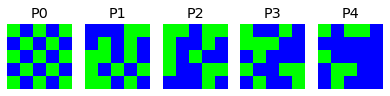

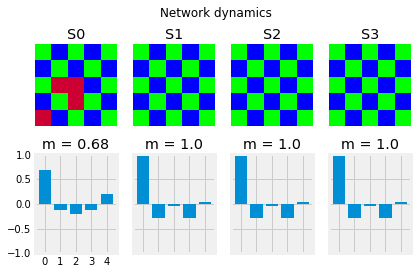

In [32]:
%matplotlib inline
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
#plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=3)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


## Our own Hopfield network model

You will write your own code to build a Hopfield network. I am leaving sample expected results below as a guide. 

You are free to use your own functions, no need to follow the guide  
Function  
1. get_patterns()  
2. perturb_pattern()  
3. calculate_weights()  
4. network_evolution()  
5. run_network()

In [ ]:
plist = get_patterns(4,5)
#plot_tools.plot_pattern_list(plist)

cue = deepcopy(plist)
#print(plist[0])

S = perturb_pattern(cue[0],3)
wghts = calculate_weights(plist, 4, 5)
#print(wghts)
#print(wghts[15][15])
state_list =[S]
#state_list.append(S)
#print(state_list)
#plot_tools.plot_pattern(S)
for i in range(3):
    state_list.append(network_evolution(S,wghts))
    S = state_list[i+1]
#    state_list.append(S)

plot_tools.plot_pattern_list(plist)
#print(state_list[0])
for i in range(4):
  state_list[i] = state_list[i].reshape(4,4)

plot_tools.plot_pattern(state_list[3].reshape(4,4))
plot_tools.plot_state_sequence_and_overlap(state_list, plist, reference_idx=0, suptitle="Network dynamics")

## Assignment 1

Q1. Can you write you own Hopfield network model that works more or less like the one simulated above?

Q2. Run the model with different parameters to figure out how the model's capacity to retrieve the correct pattern in response to a cue deteriorates as a function of   
(a) the informativeness of the cue  
(b) the number of other patterns stored in the network  
(c) the size of the network  

Present your answers with plots and/or math.

You can use plot_tools as is

In [3]:
def get_patterns(size,num):
    pl=[];
    for i in range(0,num):
       temp=(np.random.choice([-1,1],size=(size*size)))
       temp= temp.reshape(size,size)
       pl.append(temp)
    return pl

In [4]:
def perturb_pattern(cue,n):
    s = cue.shape
    temp = np.random.randint(0,cue.size,size = n)
    cue = cue.flatten()
    for i in temp:
        cue[i] = 0
    cue = cue.reshape(s)
    return cue

In [5]:
def calculate_weights(pl, n):
  n=n**2
  w = np.zeros((n,n))
  # print(w)
  #print(len(pl))
  for p in pl:
    p = p.flatten().reshape((1,n))
    #print(p.T)
    w+=np.matmul(p.T,p)
  w=w/n
  return w

In [14]:
def network_evolution(S,W):
    s = S.shape
    n = S.size
    S = S.reshape((1,n))
    S = np.matmul(W, S.T)
    S = S.reshape(s)
    S = np.sign(S)
    return S

In [7]:
def run_network(pattern_size,pattern_num,noise_flip,iter):
  plist = get_patterns(pattern_size,pattern_num)
  #plot_tools.plot_pattern_list(plist)

  cue = deepcopy(plist)
  S = perturb_pattern(cue[0],noise_flip)

  state_list=[S]
  plot_tools.plot_pattern(S)
  wghts=calculate_weights(plist, pattern_size)
  # print(S)
  for i in range(iter):
       S=network_evolution(S,wghts)
       #  print(S)
       state_list.append(S)
  plot_tools.plot_pattern_list(plist)
  #print(state_list[0])
  #plot_tools.plot_pattern(state_list[0])
  plot_tools.plot_state_sequence_and_overlap(state_list, plist, reference_idx=0, suptitle="Network dynamics")

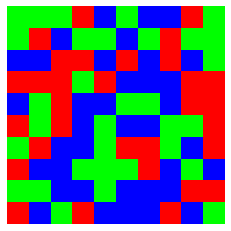

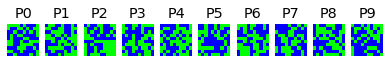

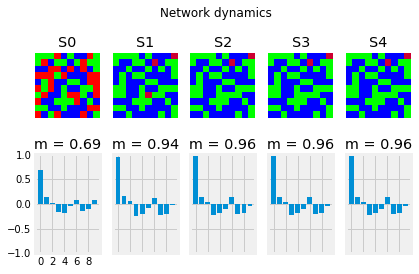

In [34]:
run_network(10,10,40,4)

**Q2.**
**(a) When the informativeness of the cue decreases(noise increases) it takes more number of iterations to retrieve the original state.**

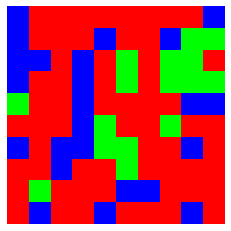

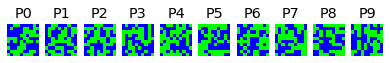

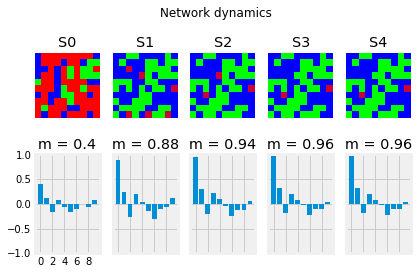

In [58]:
run_network(10,10,80,4)

when it the number of noises are low, it takes lesser number of iterations to retrieve the pattern.

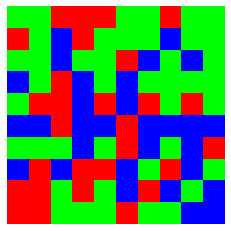

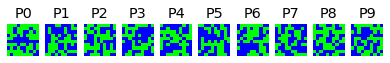

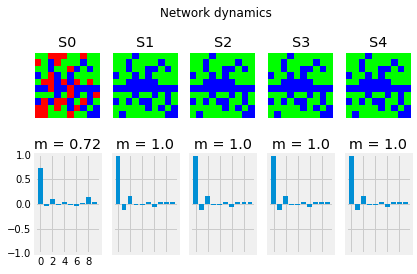

In [59]:
run_network(10,10,30,4)

**(b) When the number of other patterns stored is high, it takes more number of iterations to retrieve the original state.**

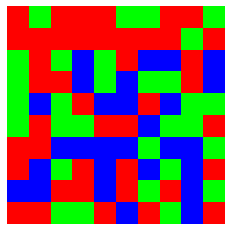

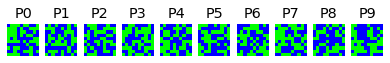

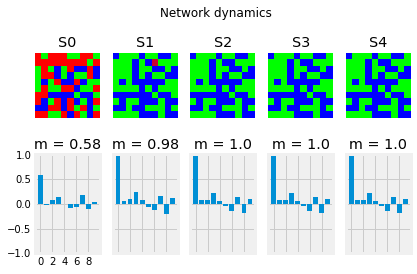

In [73]:
run_network(10,10,50,4)

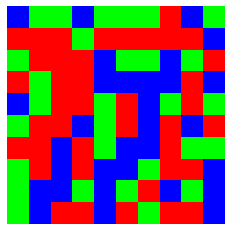

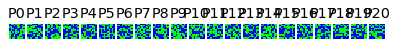

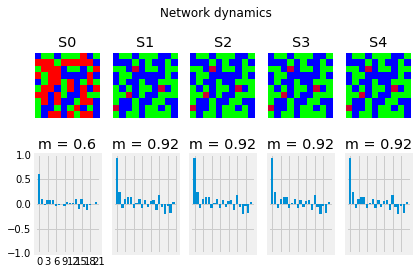

In [79]:
run_network(10,21,50,4)

**(c)When The network is increased.**

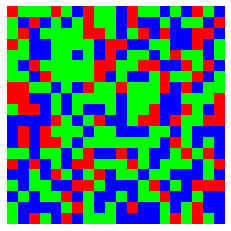

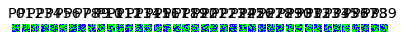

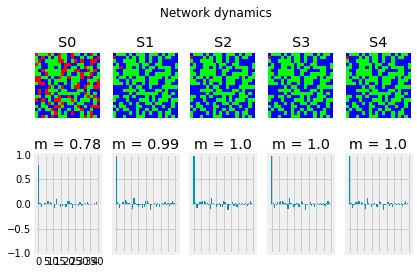

In [84]:
run_network(20,40,100,4)